In [98]:
# read top 10 states

import pickle
import numpy as np

with open('top_locations.dat') as f:
# with open('top10reason.dat') as f:
    state_top10 = pickle.load(f)
f.close()
# for (i,s) in enumerate(state_top10):
#     state_top10[i] = s.replace('"','')

In [99]:
# foursquare

file = 'auc_location_new_10fold_fsq2.dat'

with open(file) as f:
    aucs, confs, labels = pickle.load(f)
f.close()
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])

auc_mean_fsq = np.array([])
auc_ci_fsq = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_fsq = np.append(auc_mean_fsq, np.nanmean(a))
    auc_ci_fsq = np.append(auc_ci_fsq, 2*np.nanstd(a)/np.sqrt(len(labels)))


In [100]:
# sensor only

#files = ['accuracy.dat','accuracy_new300.dat','accuracy_new300_2.dat','accuracy_new300_3.dat','accuracy_new300_3_stratified.dat']
#files = ['accuracy_new100_3_depth6.dat','accuracy_new100_3_depth6_fsq2_distance.dat']
#files = ['accuracy_new100_3_depth6_fsq2.dat','accuracy_new100_3_depth6_fsq2_distance.dat']

#file = 'accuracy_new300_3.dat' # location prediction
# file = 'accuracy_reason_100_d3.dat' # reason prediction
file = 'auc_location_new_10fold_sensor2.dat'

with open(file) as f:
    aucs, confs, labels = pickle.load(f)
f.close()
# for (j,lab) in enumerate(labels):
#     for (k,l) in enumerate(lab):
#         labels[j][k] = l.replace('"','')
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])

auc_mean_sensor = np.array([])
auc_ci_sensor = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_sensor = np.append(auc_mean_sensor, np.nanmean(a))
    auc_ci_sensor = np.append(auc_ci_sensor, 2*np.nanstd(a)/np.sqrt(len(labels)))


In [127]:
# sensor + foursquare 

file = 'auc_location_new_10fold3.dat'

with open(file) as f:
    aucs, confs, labels = pickle.load(f)
f.close()
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
conf_top10 = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
            for (j2,state2) in enumerate(state_top10):
                if state2 in lab:
                    ind2 = np.where(lab==state2)[0]
                    conf_top10[j][j2] = np.append(conf_top10[j][j2], confs[k][ind,ind2])

auc_mean_all = np.array([])
auc_ci_all = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_all = np.append(auc_mean_all, np.nanmean(a))
    auc_ci_all = np.append(auc_ci_all, 2*np.nanstd(a)/np.sqrt(len(labels)))


0.604093570596
0.694395794228
0.754401542978


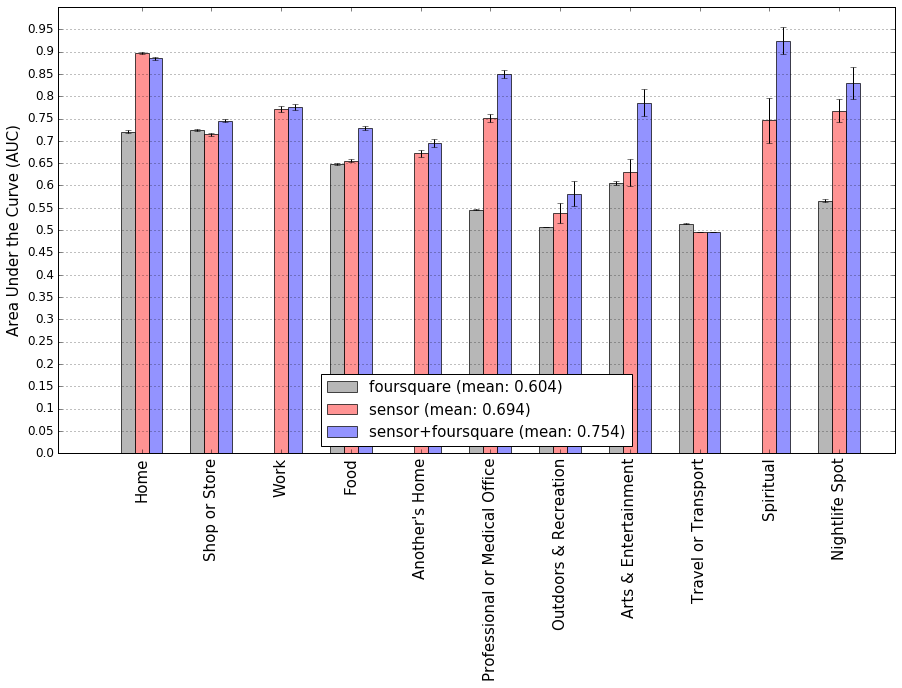

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
w = 1/5.0
plt.bar(np.arange(0,state_top10.size,1), auc_mean_fsq, yerr=auc_ci_fsq, width=w, align='center',\
         color=(.6,.6,.6), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(w,state_top10.size+w,1), auc_mean_sensor, yerr=auc_ci_sensor, width=w, align='center', \
         color=(1,.4,.4), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(2*w,state_top10.size+2*w,1), auc_mean_all, yerr=auc_ci_all, width=w, align='center', \
         color=(.4,.4,1), alpha=0.7, ecolor=(0,0,0))
plt.legend(['foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_fsq)),\
            'sensor (mean: {:.3f})'.format(np.nanmean(auc_mean_sensor)),\
            'sensor+foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_all))], loc='lower center', fontsize=15)
plt.ylabel('Area Under the Curve (AUC)',fontsize=15,color=(0,0,0))
# removing extra words
xlabel = state_top10
for (i,xl) in enumerate(xlabel):
    label_broken = xl.split('(')
    xlabel[i] = label_broken[0]
    if len(label_broken)>1:
        xlabel[i] = xlabel[i][:-1]
plt.xticks(np.arange(w,state_top10.size+w,1), xlabel, fontsize=15, color=(0,0,0), rotation=90, ha='center');
plt.yticks(np.arange(0,1,.05), np.arange(0,1,.05), fontsize=12, color=(0,0,0))
axes = plt.gca()
axes.set_xlim([-1, len(state_top10)])
axes.set_ylim([0, 1])
axes.yaxis.grid()

print np.nanmean(auc_mean_fsq)
print np.nanmean(auc_mean_sensor)
print np.nanmean(auc_mean_all)


In [61]:
auc_ci_fsq

array([ 0.00318686,  0.00205916,         nan,  0.00242644,         nan,
        0.00125752,  0.00027055,  0.00455986,  0.0008866 ,         nan,
        0.00365907])

In [ ]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confusion matrix - sensor+fousquare')

In [ ]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10_fsq):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10_fsq[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confurion matrix: foursquare')
print cm_normalized[3,:]

In [ ]:
np.random.random(10)